IE360 HOMEWORK1
Ecem Öztürk - 2022402288

INTRODUCTION:

In this homework, the aim is to find 3 times series, which are not correlated with each other and try to find independent parameters to find the best fit to achieve the target value.For this purpose, time series are selected as "Main labour force indicators (TURKSTAT)","(AMA) Automobile (Unit) OSD - Total Cars Production (AMA=Automotive Manufacturers Association)" and "ouse Sales Statistics _ Turkey _ Second hand sale(TURKSTAT)" were examined by retrieving data from CENTRAL BANK OF THE REPUBLIC OF TURKEY's website. 


After deciding on the time series to work on, I checked whether there occurs a correlation between them. All of the correlations were below 0.5 ; therefore , I continued with the analysis.

In [530]:
install.packages("zoo")
install.packages("data.table")
library("zoo")
library("ggcorrplot")
require(openxlsx) 
require(ggplot2)
require(data.table)
require(skimr)
require(GGally)
require(ggcorrplot)
require(forecast)
require(lubridate)
require(data.table)
Sys.setlocale("LC_CTYPE", "en_US.UTF-8") # For English with UTF-8 encoding, adjust as needed for your locale.



The downloaded binary packages are in
	/var/folders/tm/h12dzwn519q9gwvz38d0m4_80000gn/T//Rtmpfn7tsA/downloaded_packages

The downloaded binary packages are in
	/var/folders/tm/h12dzwn519q9gwvz38d0m4_80000gn/T//Rtmpfn7tsA/downloaded_packages


[1] "en_US.UTF-8"

In [696]:
options(repr.plot.width=12.7, repr.plot.height=8.5) #
datapath = '/Users/ecemozturk/Desktop/ecem_excel_yeni.xlsx'
car_production=read.xlsx(datapath,sheet='car_production') 

str(car_production)
car_production[,"Date"]=as.Date(as.yearmon(car_production[,"Date"],format="%Y-%m"))
colnames(car_production) <- c("Date","Production")
car_production[,"Production"]=as.numeric(car_production[,"Production"])

ggplot(car_production, aes(x = Date, y = Production)) +
  geom_line() +  # Add a line
  geom_point() +  # Add points
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y") +  # Format the date scale
  labs(title = "Production over Time", x = "Date", y = "Production") +
  theme_minimal()


'data.frame':	81 obs. of  10 variables:
 $ Date                   : chr  "2017-02" "2017-03" "2017-04" "2017-05" ...
 $ Production             : num  97129 109443 101839 104653 94839 ...
 $ EXC                    : num  3.67 3.67 3.65 3.56 3.52 3.56 3.51 3.47 3.66 3.88 ...
 $ Searches               : num  92 90 86 87 88 100 99 89 87 85 ...
 $ TPKTF11                : num  15.6 15.4 15.7 15.6 15.4 ...
 $ Elec                   : num  801841 760855 731779 737225 753017 ...
 $ motorlu_kara           : num  84.6 85 87.4 87.7 87.1 ...
 $ AnametallerFiyatEndeksi: num  230 234 236 231 231 ...
 $ export_order           : num  128 125 129 110 116 ...
 $ invest_to_capital      : num  105 109 110 111 112 ...


By looking at the automobile production time series, one can observe significant drops in Augusts. In addition, there is a drastic drop in production between March 2020 and May 2020 due to Covid, which is expected.

'data.frame':	84 obs. of  7 variables:
 $ Date                : chr  "2017-02" "2017-03" "2017-04" "2017-05" ...
 $ housesalesstatistics: num  56253 72547 62458 63582 52146 ...
 $ EXC                 : num  3.67 3.67 3.65 3.56 3.52 ...
 $ Searches            : num  42 37 35 34 34 41 38 36 33 34 ...
 $ interestrate        : num  11.4 11.1 11.3 11.5 11.7 ...
 $ house_prices_per_m2 : num  2406 2440 2458 2488 2504 ...
 $ konutfiyatendeksi   : num  96.7 97.7 98.7 100 100.5 ...


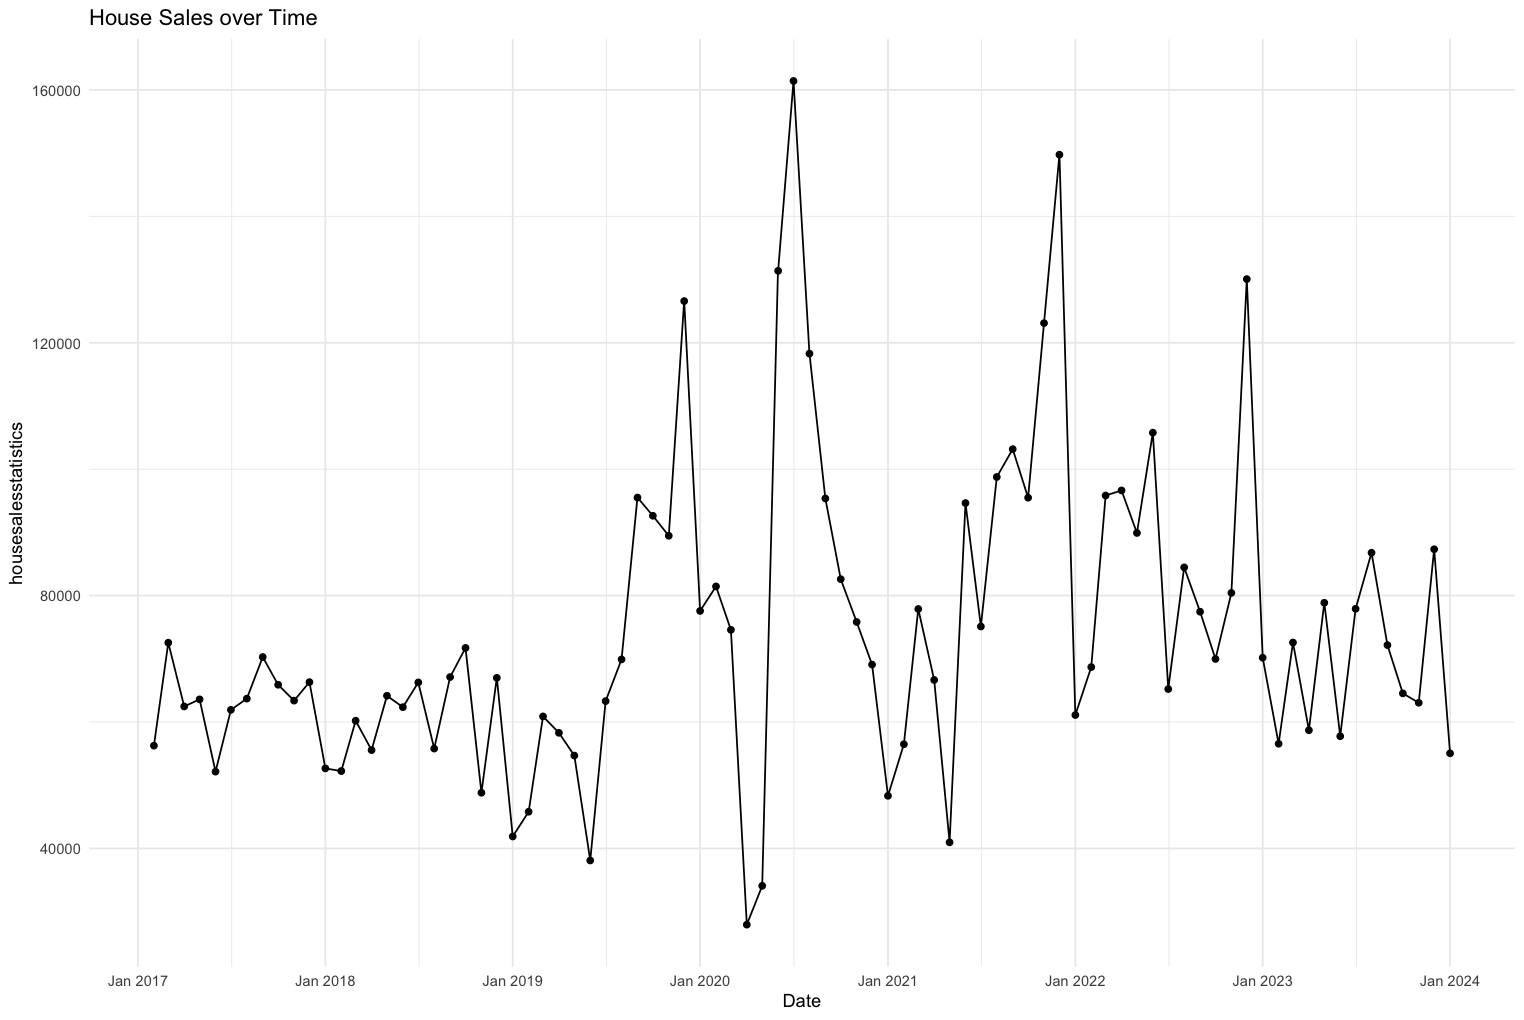

In [694]:
housing=read.xlsx(datapath,sheet='housing')
str(housing)
housing[,"Date"]=as.Date(as.yearmon(housing[,"Date"],format="%Y-%m"))
colnames(housing) <- c("Date","housesalesstatistics")
housing[,"housesalesstatistics"]=as.numeric(housing[,"housesalesstatistics"])

ggplot(housing, aes(x = Date, y = housesalesstatistics)) +
  geom_line() +  # Add a line
  geom_point() +  # Add points
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y") +  # Format the date scale
  labs(title = "House Sales over Time", x = "Date", y = "housesalesstatistics") +
  theme_minimal()

By looking at the House Sales time series, one can see that there is a drastic drop in the house sales between March 2020 and May 2020 due to Covid, which is expected. After May, there occurs a significant increase in the house prices, and the effect of it continues in the next 2 years.

'data.frame':	84 obs. of  6 variables:
 $ Date                   : chr  "2017-02" "2017-03" "2017-04" "2017-05" ...
 $ Employment             : num  31236 31003 31291 31568 31240 ...
 $ EXC                    : num  3.67 3.67 3.65 3.56 3.52 ...
 $ search_is_ilan         : num  50 48 37 42 47 53 45 51 45 40 ...
 $ uretimhacmiguvenaraligi: num  125 130 125 117 117 ...
 $ interest_rate_fortrade : num  14.7 15.2 15.5 15.3 16.2 ...


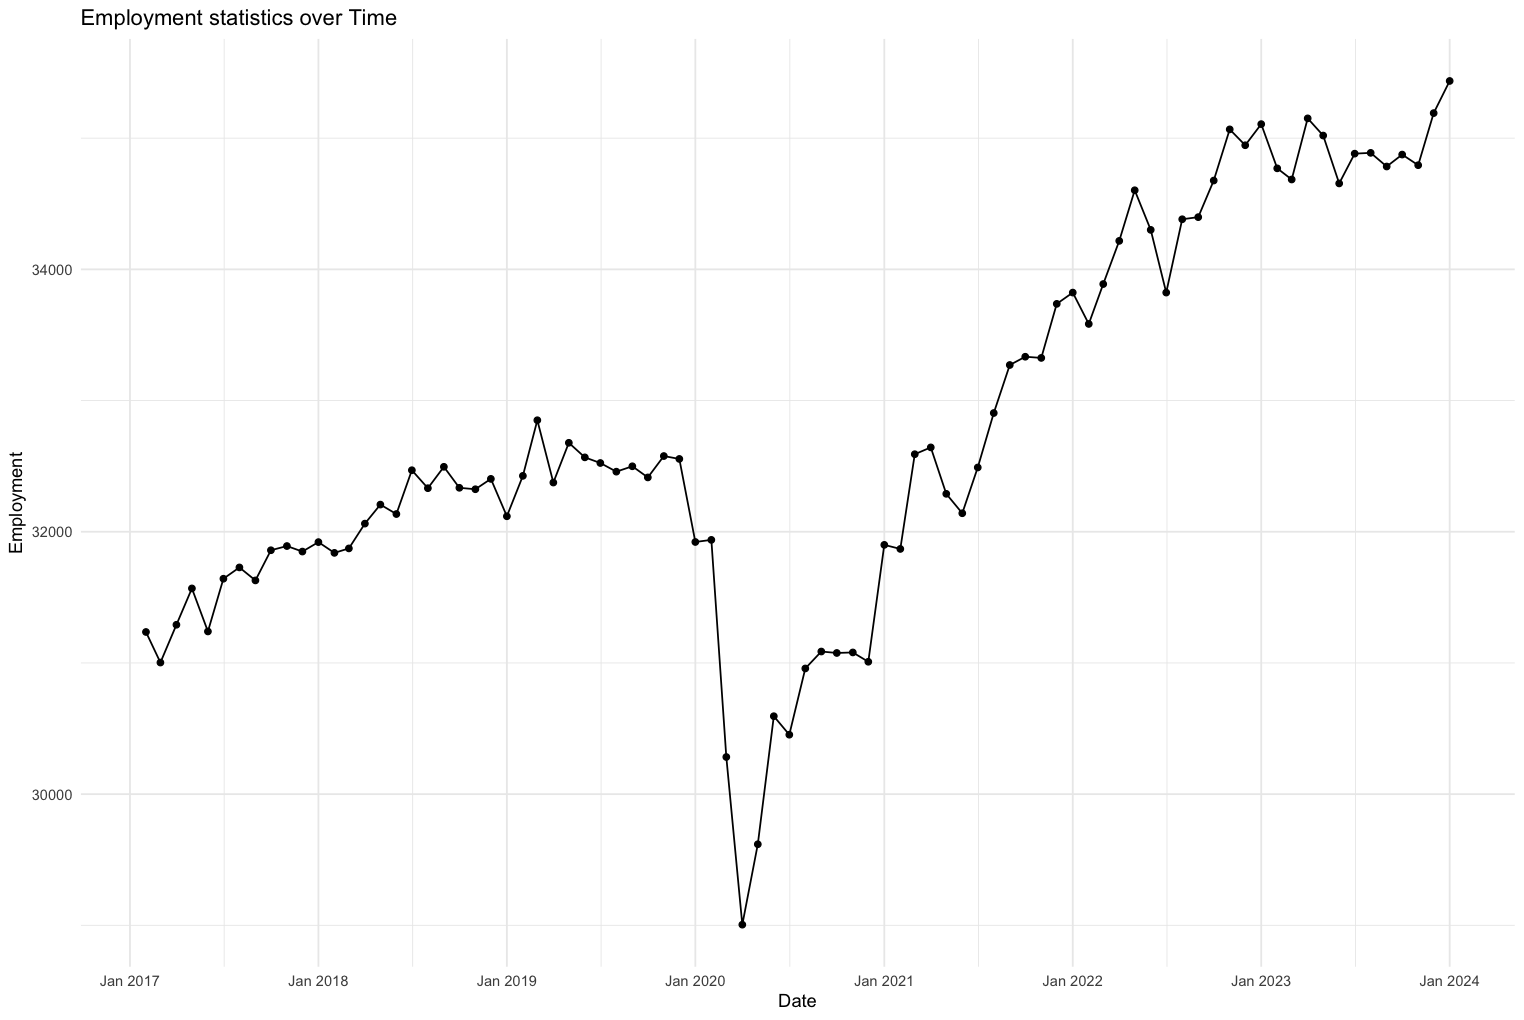

In [695]:
employment=read.xlsx(datapath,sheet='employment')
str(employment)
employment[,"Date"]=as.Date(as.yearmon(employment[,"Date"],format="%Y-%m"))
colnames(employment) <- c("Date","Employment")
employment[,"Employment"]=as.numeric(employment[,"Employment"])

ggplot(employment, aes(x = Date, y = Employment)) +
  geom_line() + geom_point() + 
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y") +  # Format the date scale
  labs(title = "Employment statistics over Time", x = "Date", y = "Employment") +
  theme_minimal()

Employment statistics draws a seasonal increase and decrease each year, which is expected. Similar to the previous 2 time-series, there occurs a drastic drop in the employment between March 2020 and May 2020 due to Covid. After that period, we observe an increasing trend.

In [668]:
summary_data = skim(car_production)
print(summary_data)

── Data Summary ────────────────────────
                           Values        
Name                       car_production
Number of rows             81            
Number of columns          10            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  9             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Date                  0             1   7   7     0       81          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate     mean       sd        p0
1 Production                      0             1  78128.  19245.     9661   
2 EXC                             0             1     10.1     7.40    

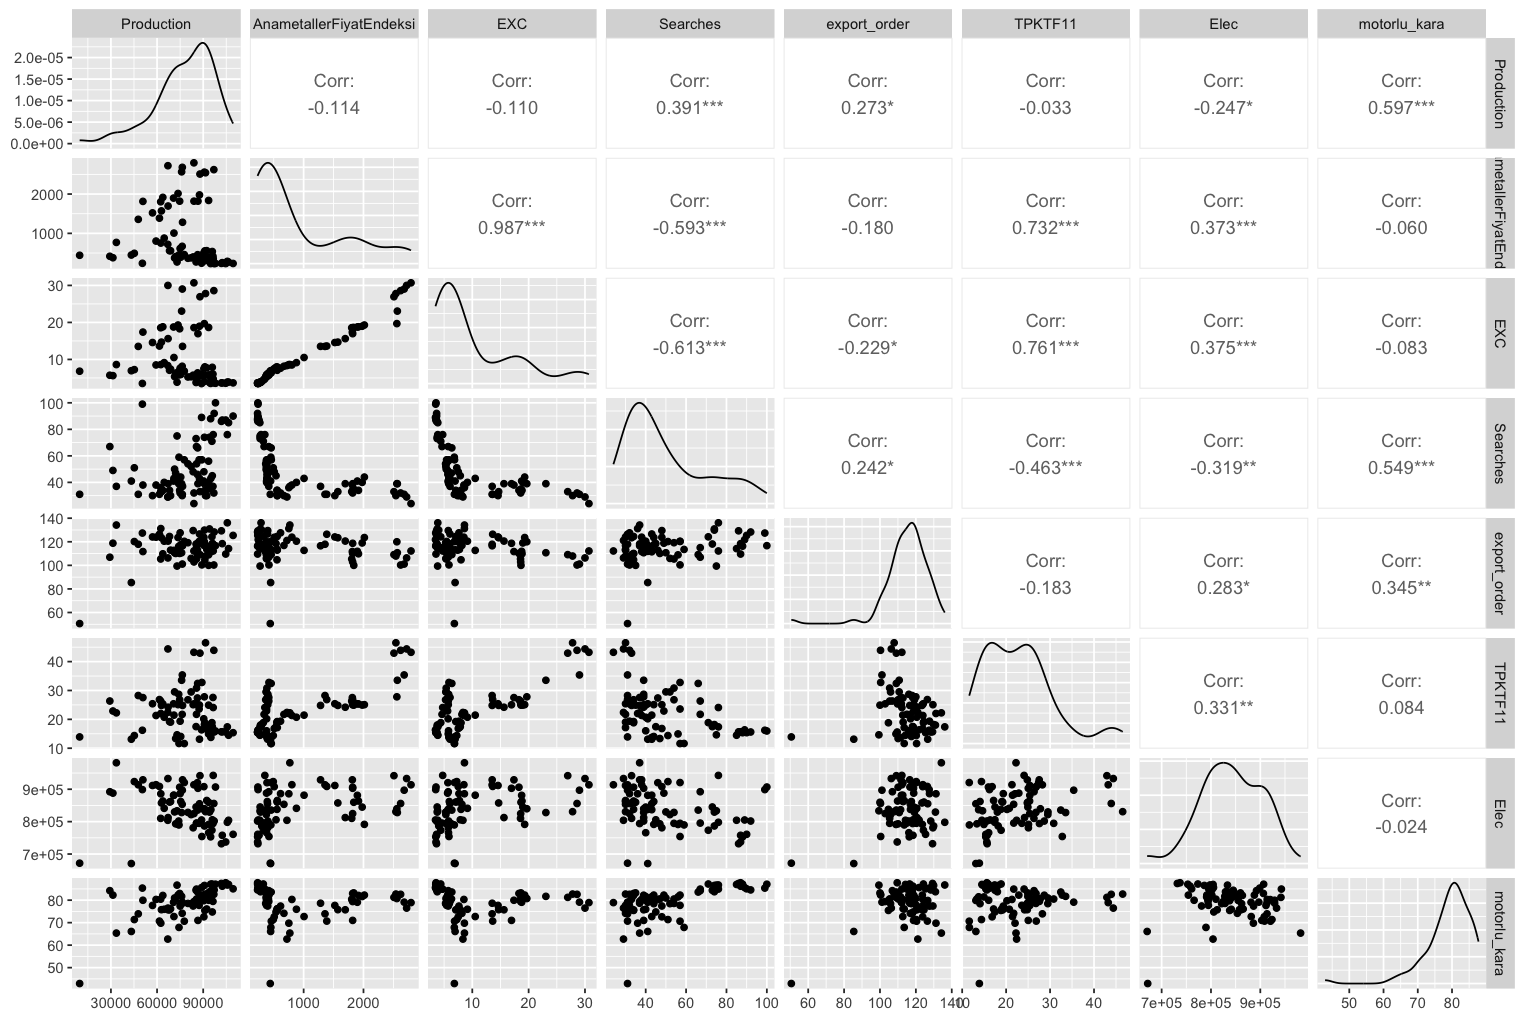

In [669]:
car_production=read.xlsx(datapath,sheet='car_production')
ggpairs(car_production[, c("Production", "AnametallerFiyatEndeksi","EXC", "Searches","export_order","TPKTF11","Elec","motorlu_kara")])

Warning message:
“column(s) not removed because not found: [Date]”


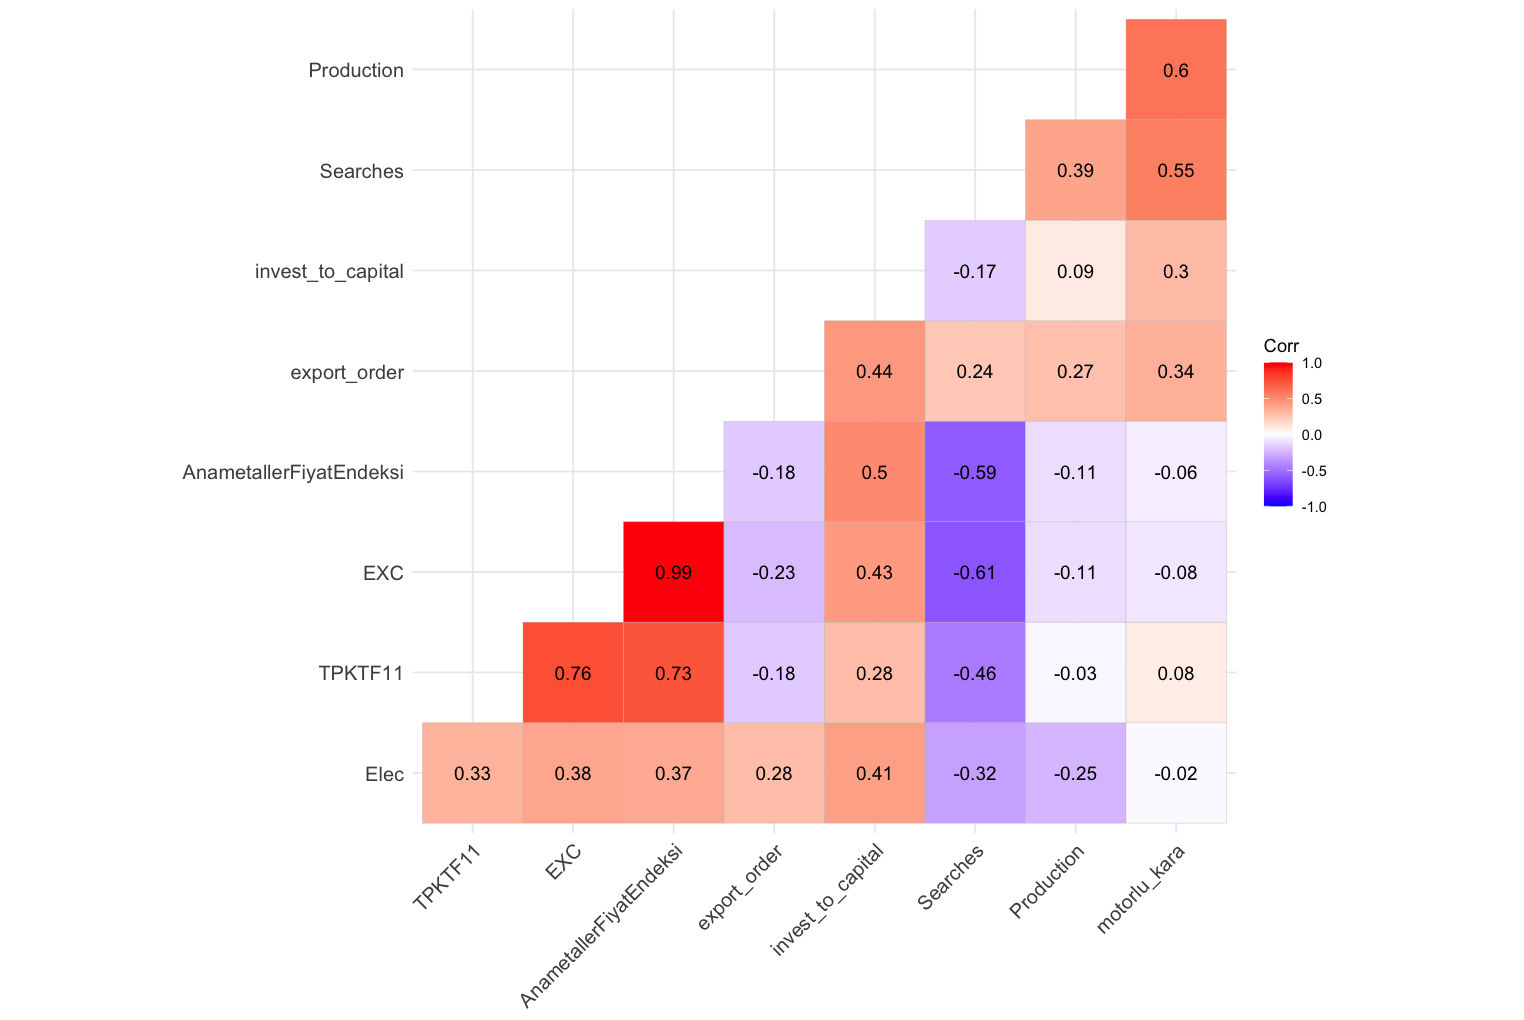

In [697]:
car_production <- as.data.table(car_production)

# Select only the numeric columns, excluding the Date column
numeric_columns <- sapply(car_production, is.numeric)
correl_info <- cor(car_production[, numeric_columns, with = FALSE][, !"Date", with = FALSE])

ggcorrplot(correl_info, hc.order = TRUE, type = "lower", lab = TRUE)

Searches seen in the ggpairs represents Google Trends data for "satilik araba".

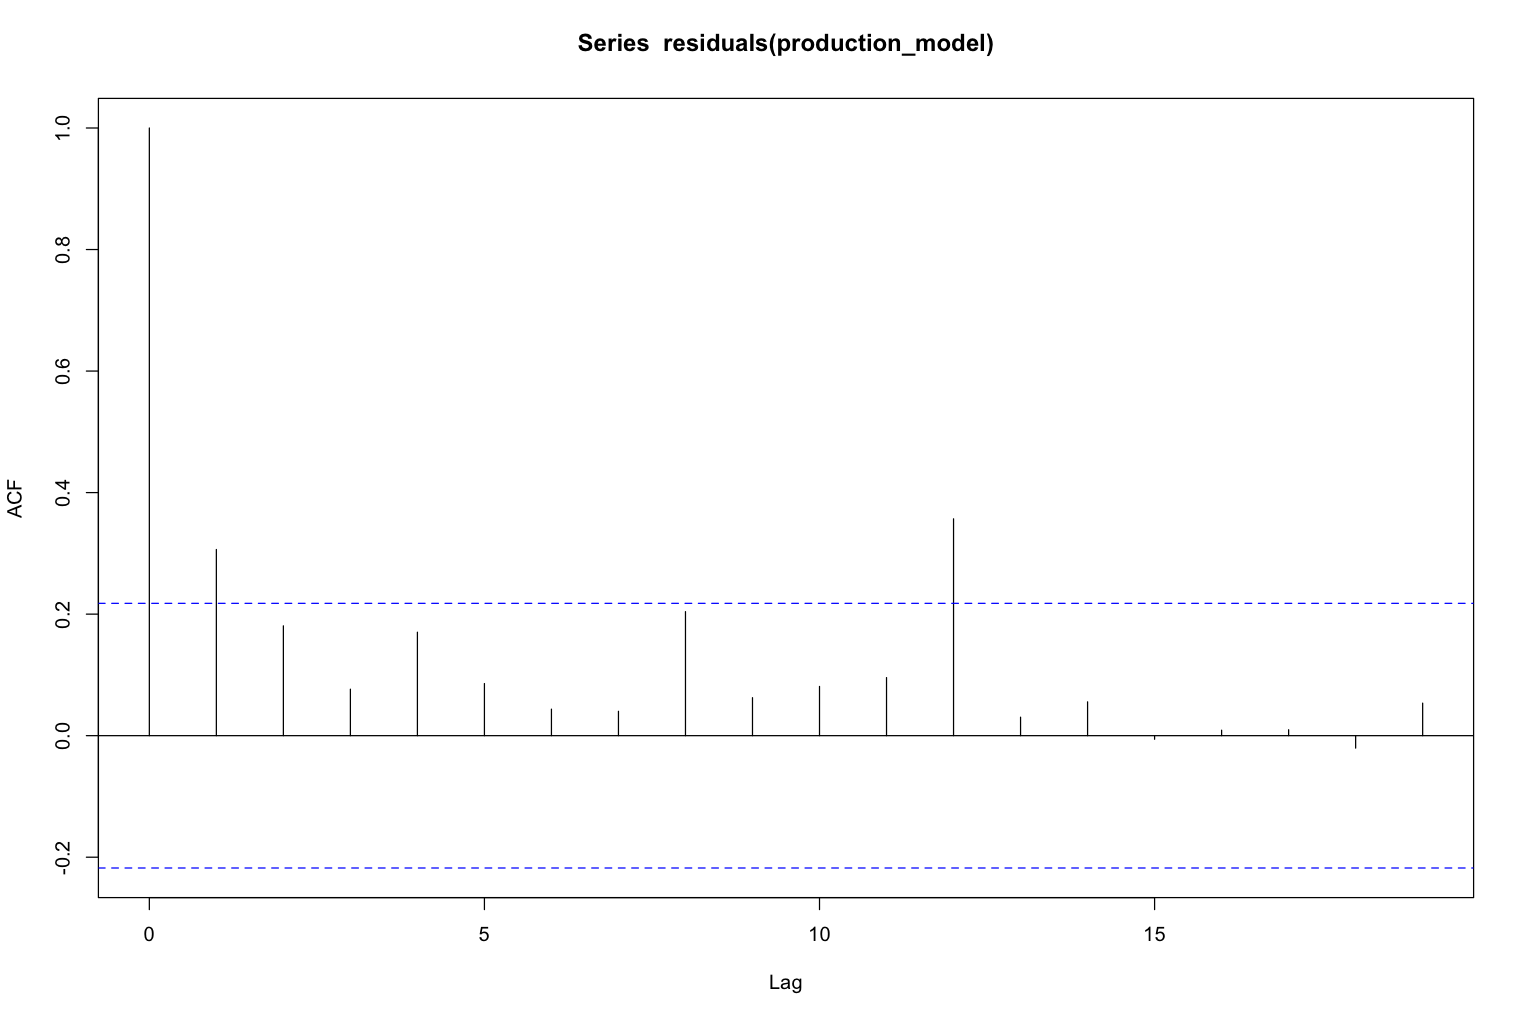

In [670]:
car_production <- as.data.table(car_production)
production_model <- lm(Production ~ 1, data = car_production)
acf(residuals(production_model))

In [671]:
car_production <- as.data.table(car_production)
car_production$trend <- 1:nrow(car_production)
full_model <- lm(formula = Production ~ trend+motorlu_kara + Elec+EXC +AnametallerFiyatEndeksi+export_order, data = car_production)

summary(full_model)



Call:
lm(formula = Production ~ trend + motorlu_kara + Elec + EXC + 
    AnametallerFiyatEndeksi + export_order, data = car_production)

Residuals:
   Min     1Q Median     3Q    Max 
-47596  -7728    273   7836  28172 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.055e+03  3.303e+04  -0.062 0.950564    
trend                   -5.175e+01  2.162e+02  -0.239 0.811460    
motorlu_kara             1.427e+03  3.591e+02   3.973 0.000163 ***
Elec                    -1.096e-01  3.284e-02  -3.338 0.001323 ** 
EXC                      3.217e+03  1.477e+03   2.177 0.032650 *  
AnametallerFiyatEndeksi -2.605e+01  1.417e+01  -1.839 0.069946 .  
export_order             4.574e+02  1.784e+02   2.563 0.012393 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14550 on 74 degrees of freedom
Multiple R-squared:  0.4712,	Adjusted R-squared:  0.4283 
F-statistic: 10.99 on 6 and 74 DF,  p-value: 1

After checking some parameters which I thought that they could be effective, I plotted their correlations with the production trend and generated a fit by using 5 parameters with highest correlation value with production. Although some of the introduced parameters are significant and p-values are low, Adjusted R-squared value can be improved by introducing new variables.

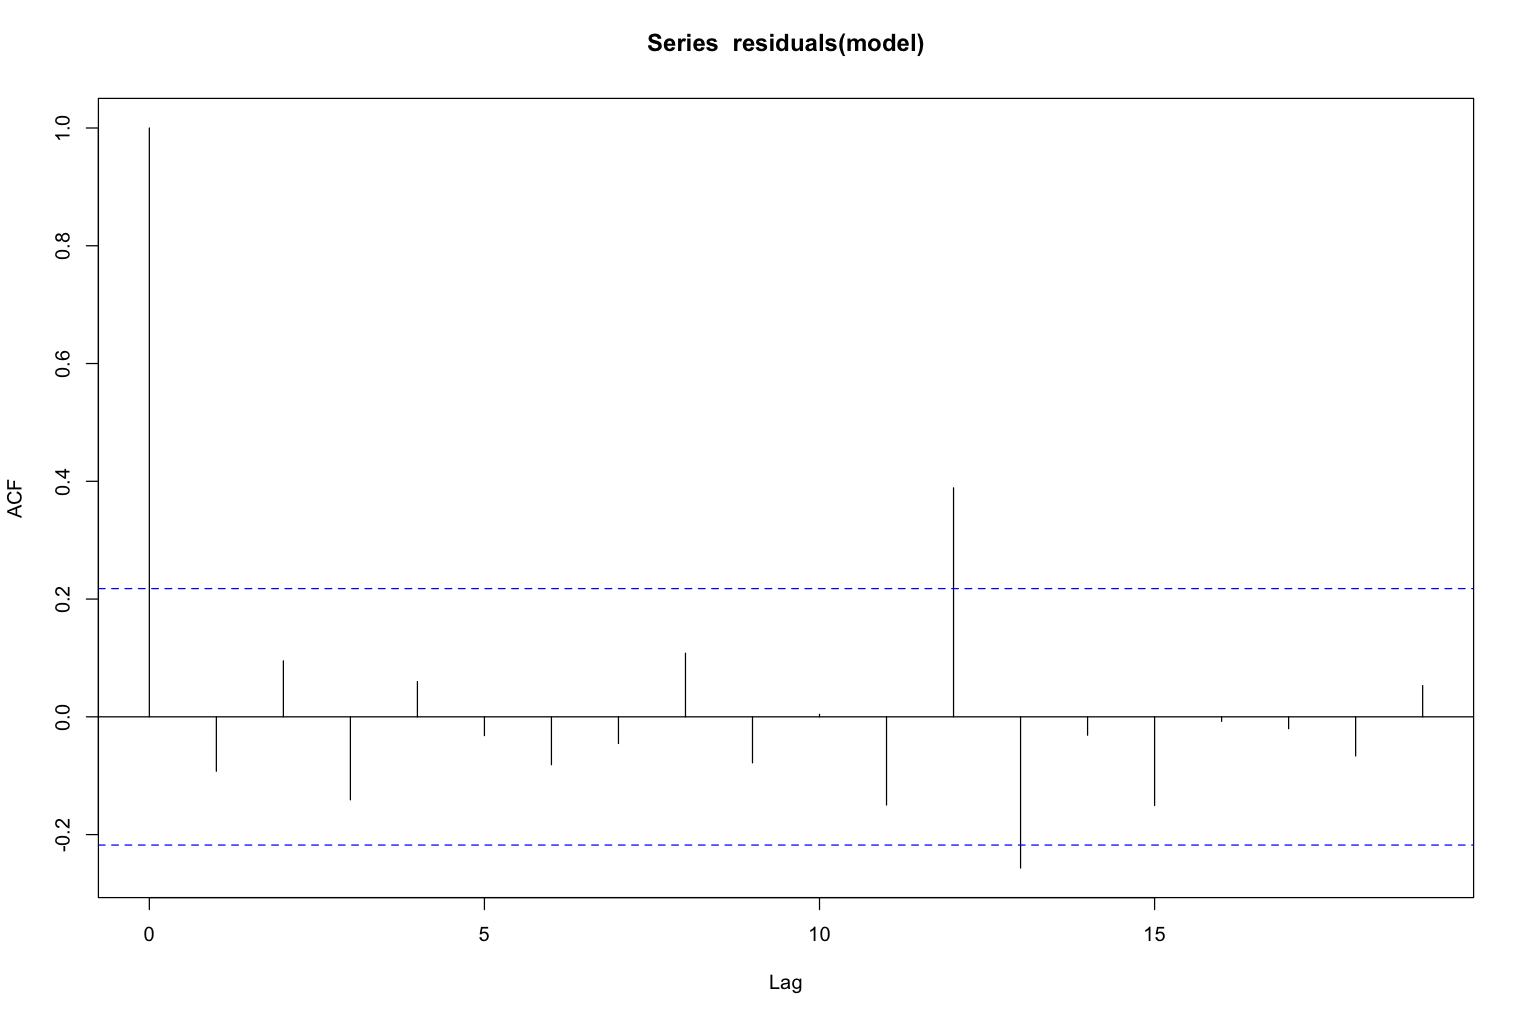

In [672]:
acf(residuals(model)) 

Most of the residuals between the lags of the first model are insignificant except 2 of them.

In [673]:
car_production$month <- substr(car_production$Date, 6, 7)
car_production$is_august <- ifelse(car_production$month == "08", 1, 0)
model_withlags <- lm(Production ~ trend+motorlu_kara + Elec + is_august+TPKTF11 +AnametallerFiyatEndeksi+export_order, data = car_production)

summary(model_withlags)


Call:
lm(formula = Production ~ trend + motorlu_kara + Elec + is_august + 
    TPKTF11 + AnametallerFiyatEndeksi + export_order, data = car_production)

Residuals:
     Min       1Q   Median       3Q      Max 
-25066.2  -7528.4   -189.3   9005.5  22565.6 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.543e+04  2.728e+04  -0.932    0.354    
trend                   -1.684e+02  1.814e+02  -0.928    0.356    
motorlu_kara             1.423e+03  2.936e+02   4.848 6.83e-06 ***
Elec                    -3.266e-02  2.892e-02  -1.129    0.262    
is_august               -4.407e+04  6.587e+03  -6.691 3.88e-09 ***
TPKTF11                 -2.161e+01  2.635e+02  -0.082    0.935    
AnametallerFiyatEndeksi  2.273e+00  5.461e+00   0.416    0.679    
export_order             2.260e+02  1.396e+02   1.618    0.110    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11900 on 73 degrees of freedom
M

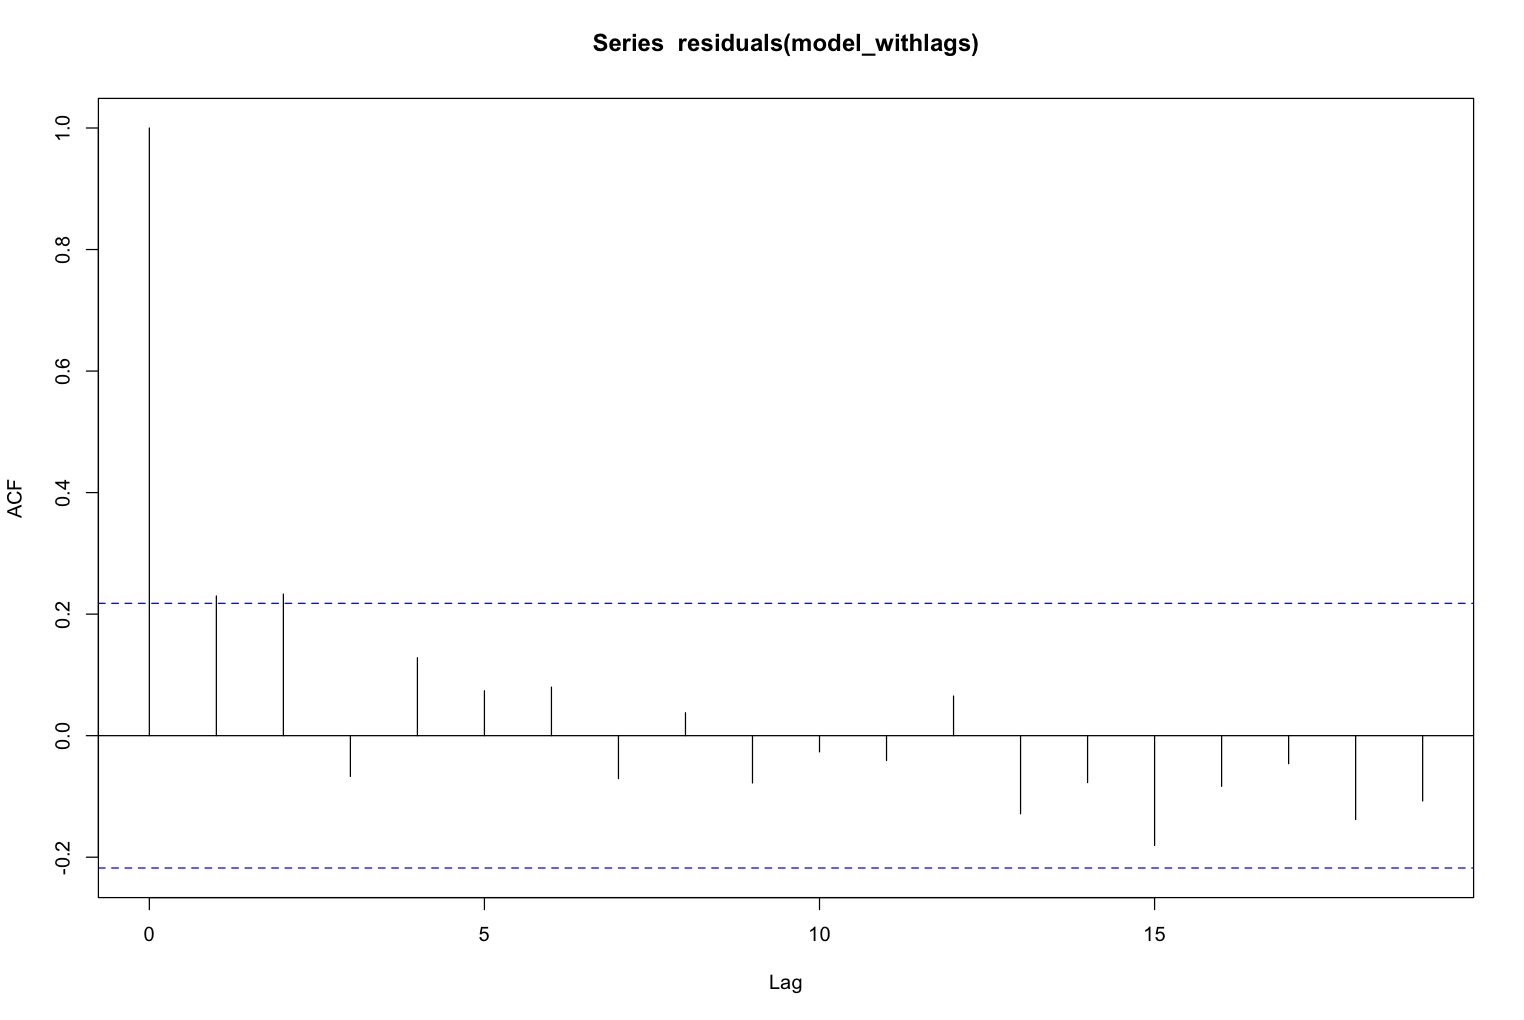

In [674]:
acf(residuals(model_withlags)) 

To improve my model, I added dummy variable for August, since we observe significant drops in this month each year. The ACF plotted above also demonstrates the improvement of the line fit. By doing so, Adjusted R-square value and residual standard error value also improved, indicating that new model fits better to the vehicle production time-series.

In [675]:
housing=read.xlsx(datapath,sheet='housing') 
str(housing)

'data.frame':	84 obs. of  7 variables:
 $ Date                : chr  "2017-02" "2017-03" "2017-04" "2017-05" ...
 $ housesalesstatistics: num  56253 72547 62458 63582 52146 ...
 $ EXC                 : num  3.67 3.67 3.65 3.56 3.52 ...
 $ Searches            : num  42 37 35 34 34 41 38 36 33 34 ...
 $ interestrate        : num  11.4 11.1 11.3 11.5 11.7 ...
 $ house_prices_per_m2 : num  2406 2440 2458 2488 2504 ...
 $ konutfiyatendeksi   : num  96.7 97.7 98.7 100 100.5 ...


In [676]:
summary_data = skim(housing)
print(housing)

      Date housesalesstatistics       EXC Searches interestrate
1  2017-02                56253  3.672360       42      11.3775
2  2017-03                72547  3.665943       37      11.0560
3  2017-04                62458  3.653835       35      11.2750
4  2017-05                63582  3.563862       34      11.5450
5  2017-06                52146  3.518990       34      11.7200
6  2017-07                61920  3.559867       41      12.0150
7  2017-08                63700  3.512477       38      12.4900
8  2017-09                70279  3.468047       36      12.8680
9  2017-10                65888  3.662259       33      13.0450
10 2017-11                63378  3.879050       34      13.1175
11 2017-12                66311  3.847705       32      13.5240
12 2018-01                52656  3.772327       34      14.1400
13 2018-02                52240  3.778020       37      14.6825
14 2018-03                60204  3.880877       35      14.7880
15 2018-04                55553  4.05403

Warning message:
“column(s) not removed because not found: [Date]”


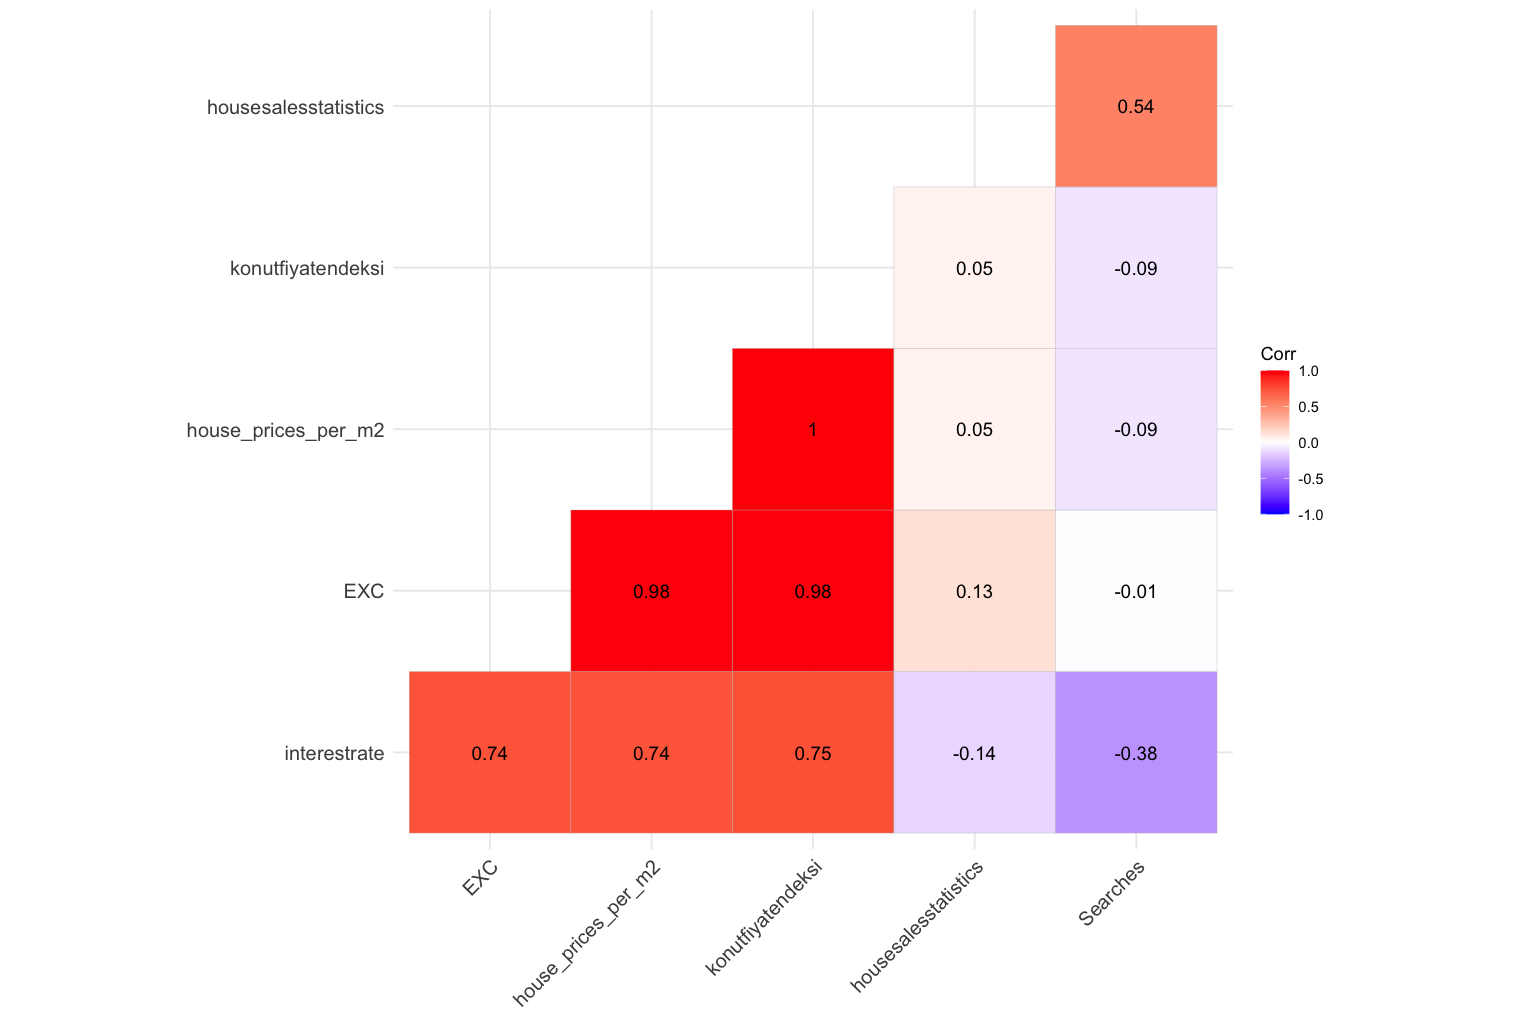

In [677]:
housing <- as.data.table(housing)

# Select only the numeric columns, excluding the Date column
numeric_columns2 <- sapply(housing, is.numeric)
correl_info2 <- cor(housing[, numeric_columns2, with = FALSE][, !"Date", with = FALSE])

ggcorrplot(correl_info2, hc.order = TRUE, type = "lower", lab = TRUE)

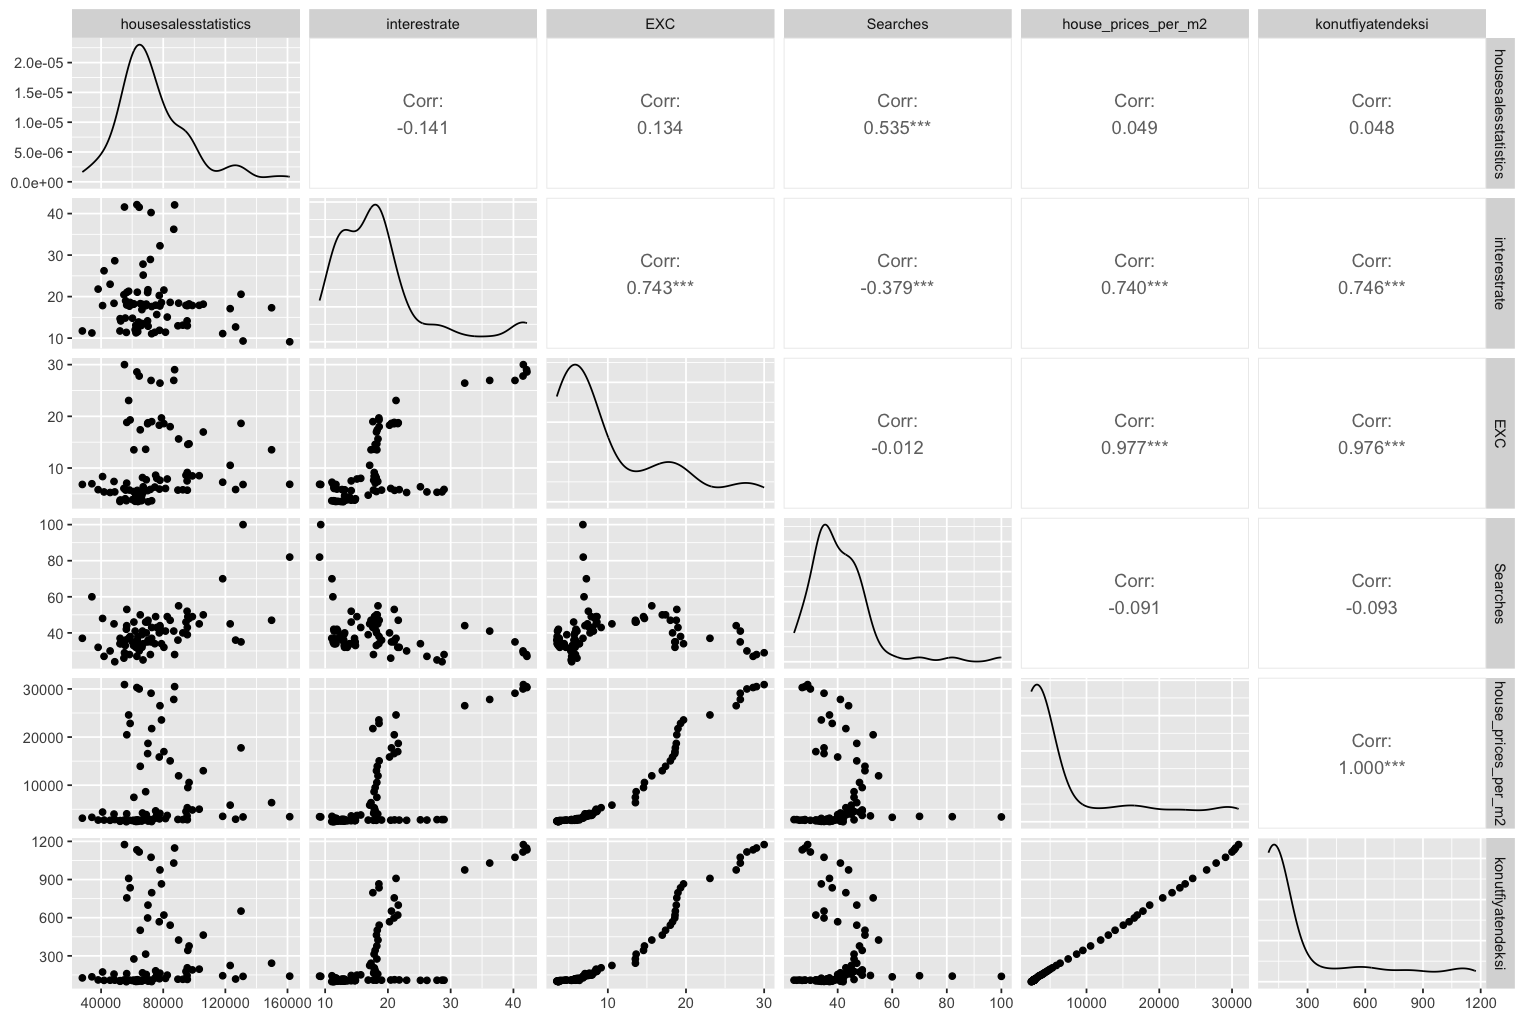

In [678]:
housing=read.xlsx(datapath,sheet='housing')
ggpairs(housing[, c("housesalesstatistics", "interestrate","EXC", "Searches","house_prices_per_m2","konutfiyatendeksi")])

My deduction for many dependent variable parameters is as follows:
Since "konutfiyatendeksi" and "house_prices_per_m2" are highly correlated, I only used house_prices_per_m2 parameter since konutfiyatendeksi would not have an additional impact on my fit.

In addition, searches column represents Google Trend data for "satilik ev" and it is highly correlated with house sales statistics, as expected.

In [679]:
house <- as.data.table(housing)
housing$trend <- 1:nrow(housing)
full_model1 <- lm(formula = housesalesstatistics ~ trend+interestrate + house_prices_per_m2 + EXC , data = housing)

summary(full_model1)


Call:
lm(formula = housesalesstatistics ~ trend + interestrate + house_prices_per_m2 + 
    EXC, data = housing)

Residuals:
   Min     1Q Median     3Q    Max 
-56384  -9886  -1037   9278  73870 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         68250.857   8370.905   8.153 4.38e-12 ***
trend                 188.032    284.820   0.660   0.5111    
interestrate        -1434.783    493.169  -2.909   0.0047 ** 
house_prices_per_m2    -4.065      1.606  -2.531   0.0133 *  
EXC                  5621.556   2559.702   2.196   0.0310 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21360 on 79 degrees of freedom
Multiple R-squared:  0.2744,	Adjusted R-squared:  0.2376 
F-statistic: 7.468 on 4 and 79 DF,  p-value: 3.727e-05


It can be seen from the low adjusted R-squared value that the linear regression model that I introduced did not fit well to the time series.

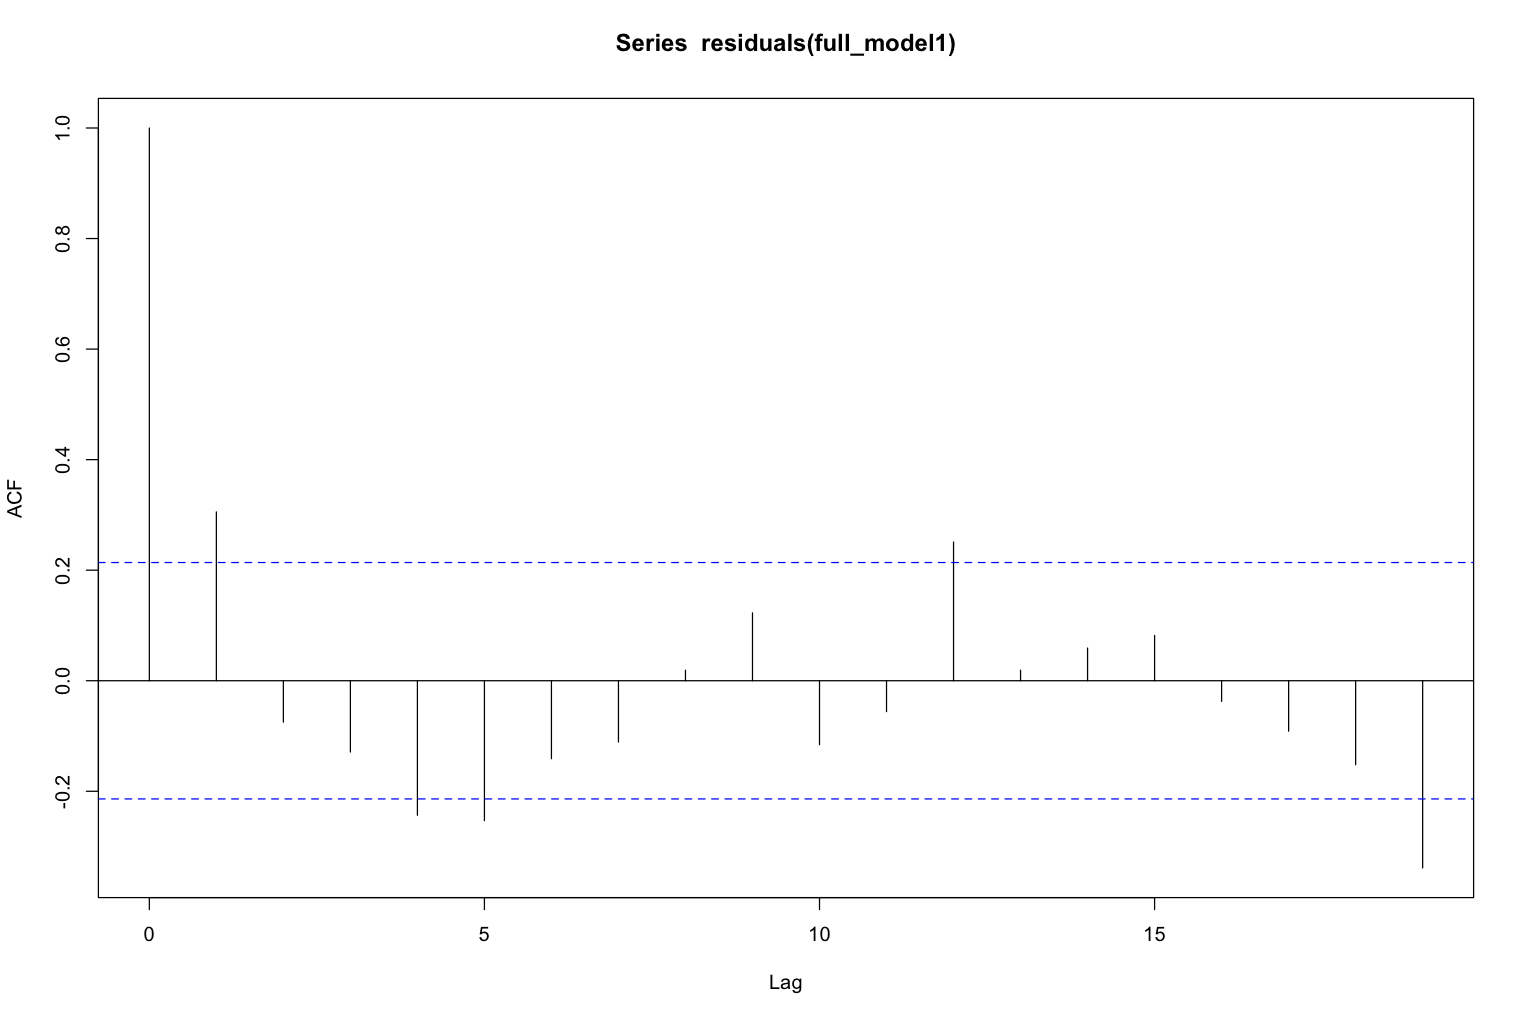

In [680]:
acf(residuals(full_model1)) 

In [681]:
#Introducing Covid period
covid_period_start <- "2020-03"
covid_periodfirsteffects <- "2020-05"
housing$is_covid_period <- ifelse(housing$Date >= covid_period_start & housing$Date <= covid_periodfirsteffects, 1, 0)

model_withlags1 <- lm(housesalesstatistics ~ EXC + is_covid_period + interestrate + house_prices_per_m2 , data = housing)

summary(model_withlags1)


Call:
lm(formula = housesalesstatistics ~ EXC + is_covid_period + interestrate + 
    house_prices_per_m2, data = housing)

Residuals:
   Min     1Q Median     3Q    Max 
-42528 -11888  -3342   9885  70739 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          73473.327   7718.442   9.519 9.46e-15 ***
EXC                   7415.832   1414.068   5.244 1.28e-06 ***
is_covid_period     -41108.939  12008.932  -3.423 0.000983 ***
interestrate         -1791.793    435.989  -4.110 9.61e-05 ***
house_prices_per_m2     -5.001      1.206  -4.148 8.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19990 on 79 degrees of freedom
Multiple R-squared:  0.3646,	Adjusted R-squared:  0.3325 
F-statistic: 11.33 on 4 and 79 DF,  p-value: 2.555e-07


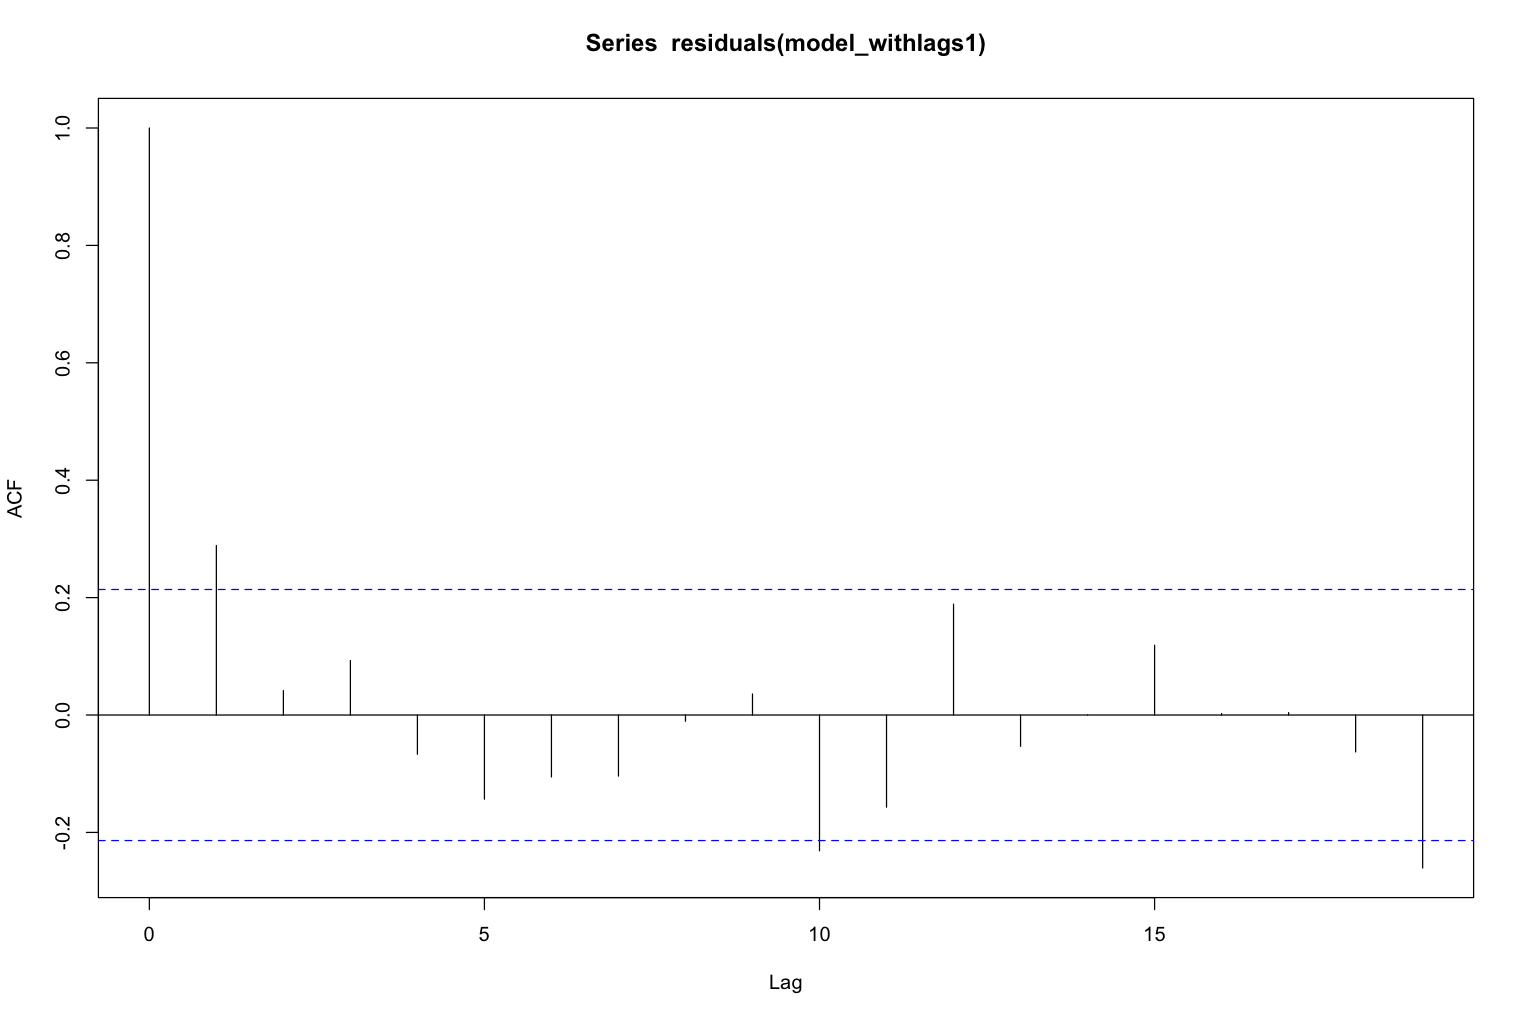

In [682]:
acf(residuals(model_withlags1)) 

After introducing Covid period, I observed slight improvement in some of the correlations between lags. In addition, the model fits better to the time series with improved Adjusted R-square value and residual standard error.

In [683]:
housing$Date <- as.Date(paste0(housing$Date, "-01"))  
housing$month <- format(housing$Date, "%m")
month_dummies <- model.matrix(~ month - 1, data = housing)  # '- 1' to remove the intercept
housing <- cbind(housing, month_dummies)
updated_model <- update(model_withlags1, . ~ . + month_dummies)
summary(updated_model)
# Note: January is omitted to avoid the dummy variable trap (perfect multicollinearity)


Call:
lm(formula = housesalesstatistics ~ EXC + is_covid_period + interestrate + 
    house_prices_per_m2 + month_dummies, data = housing)

Residuals:
   Min     1Q Median     3Q    Max 
-37450  -8993   -246   7874  65053 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          106286.935  10462.413  10.159 2.86e-15 ***
EXC                    6589.858   1273.453   5.175 2.19e-06 ***
is_covid_period      -34617.725  11194.397  -3.092 0.002879 ** 
interestrate          -2114.745    406.104  -5.207 1.94e-06 ***
house_prices_per_m2      -4.171      1.092  -3.819 0.000293 ***
month_dummiesmonth01 -40620.245   9446.061  -4.300 5.58e-05 ***
month_dummiesmonth02 -39868.408   9604.466  -4.151 9.43e-05 ***
month_dummiesmonth03 -24334.282   9793.992  -2.485 0.015436 *  
month_dummiesmonth04 -36856.255   9787.236  -3.766 0.000349 ***
month_dummiesmonth05 -36986.354   9783.493  -3.780 0.000332 ***
month_dummiesmon

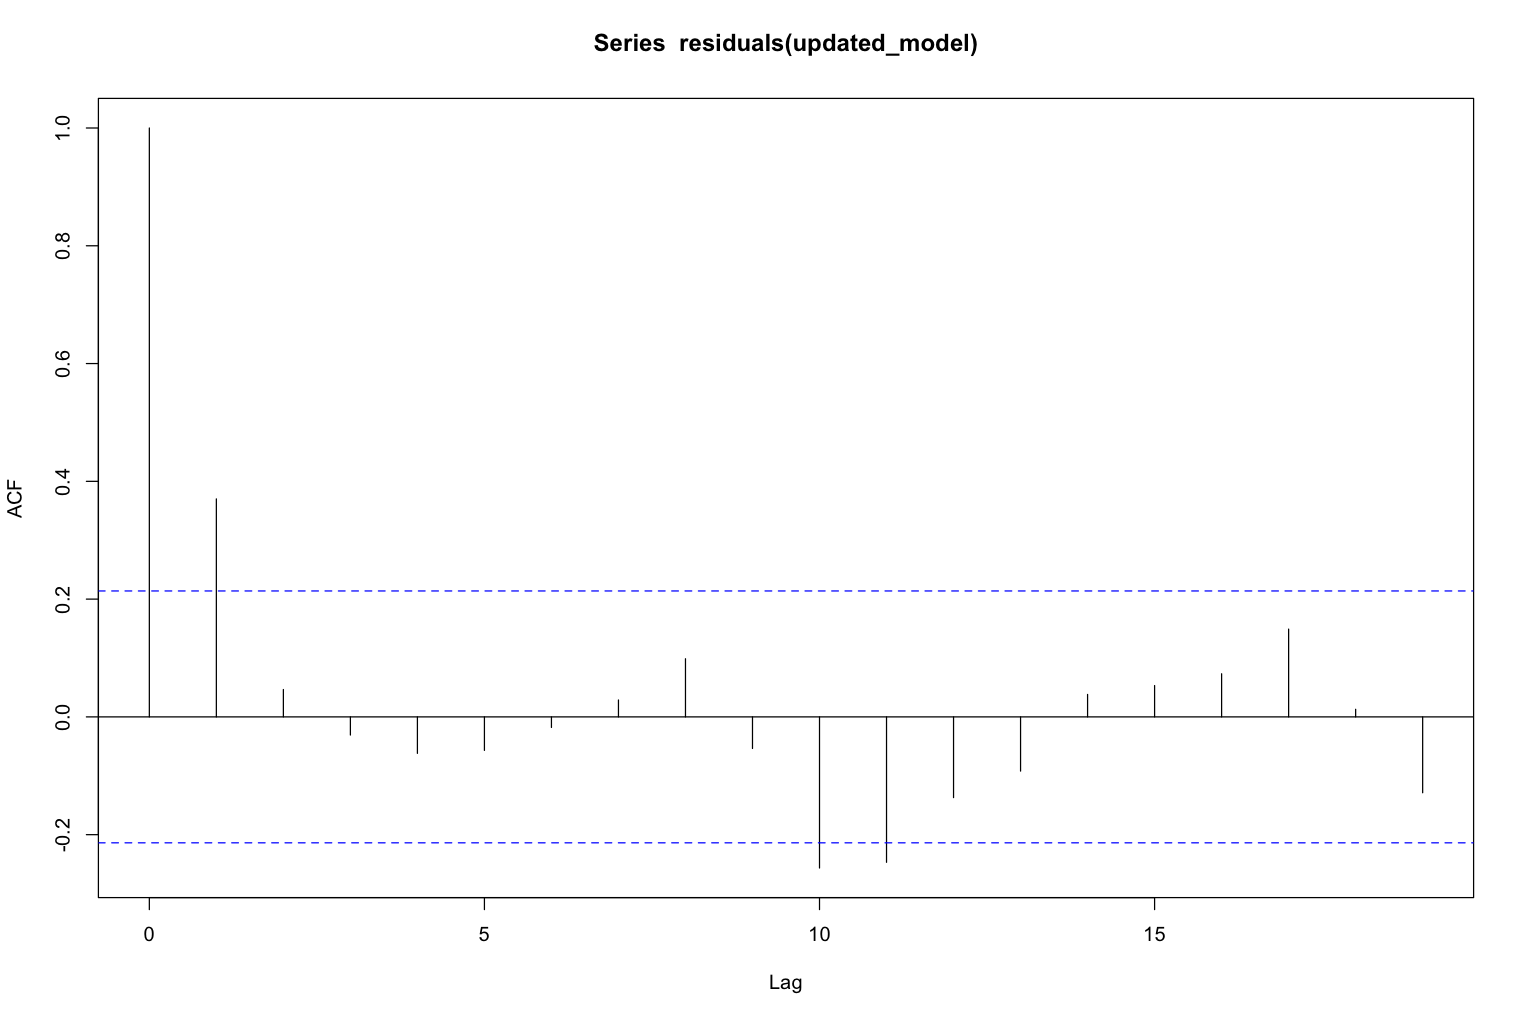

In [684]:
acf(residuals(updated_model)) 

Introducing monthly seasonality, there occurred slight improvement in Adjusted R-square value and residual standard error.

Warning message:
“column(s) not removed because not found: [Date]”


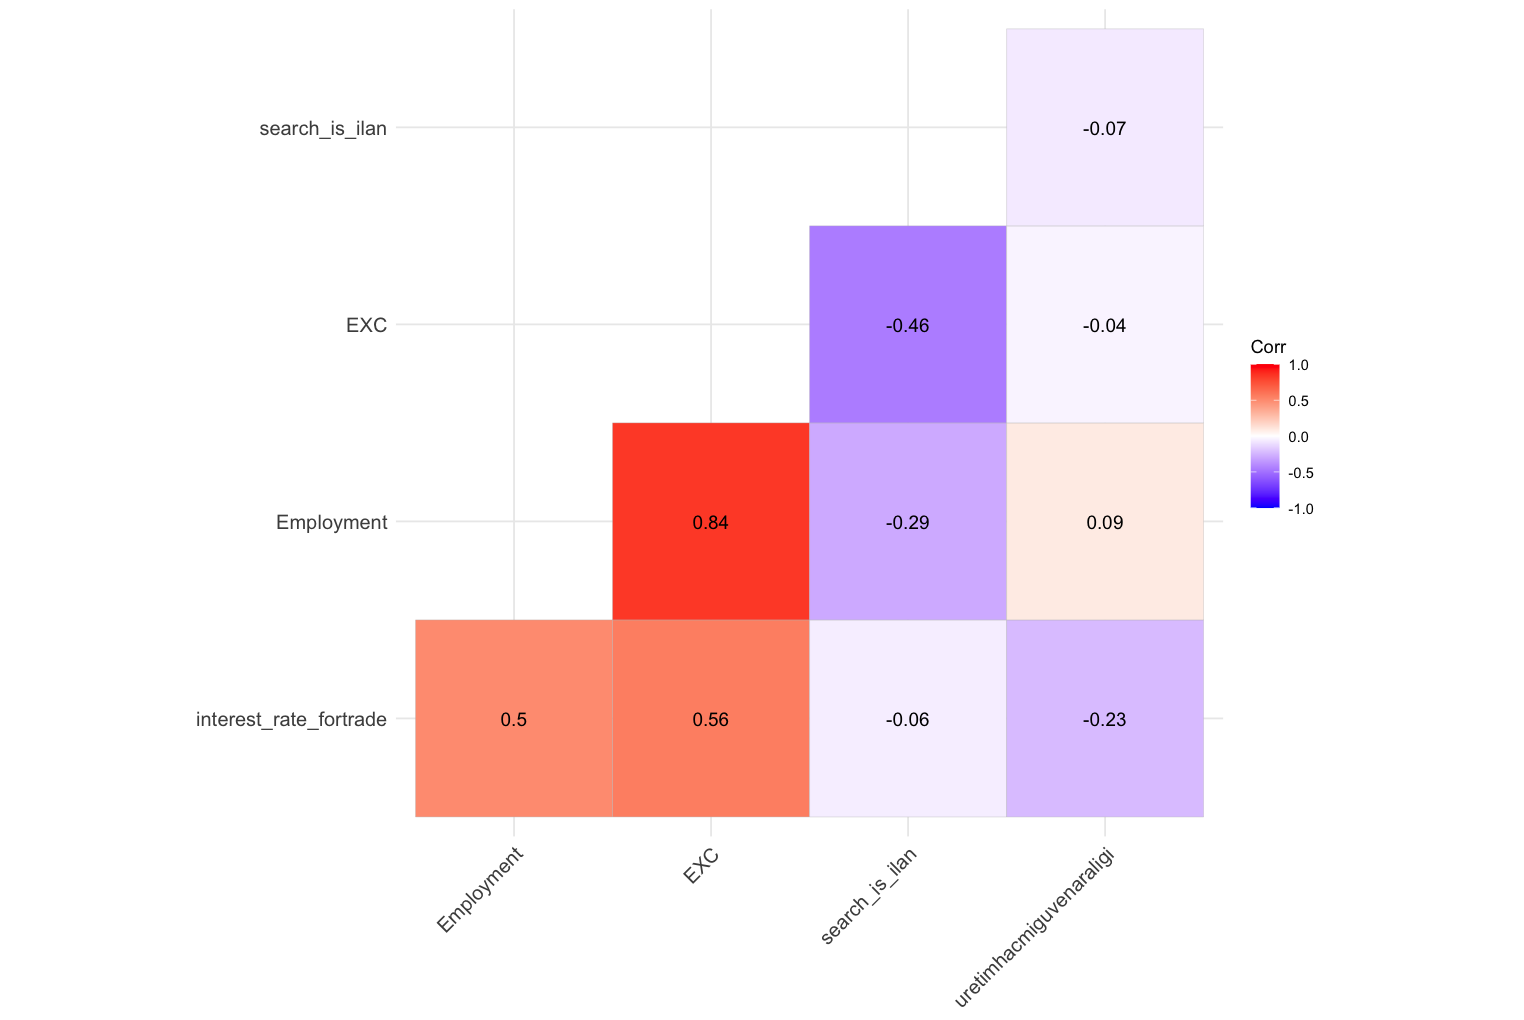

In [685]:
employment <- as.data.table(employment)

# Select only the numeric columns, excluding the Date column
numeric_columns3 <- sapply(employment, is.numeric)
correl_info3 <- cor(employment[, numeric_columns3, with = FALSE][, !"Date", with = FALSE])

# Now visualize the correlation matrix using ggcorrplot
ggcorrplot(correl_info3, hc.order = TRUE, type = "lower", lab = TRUE)


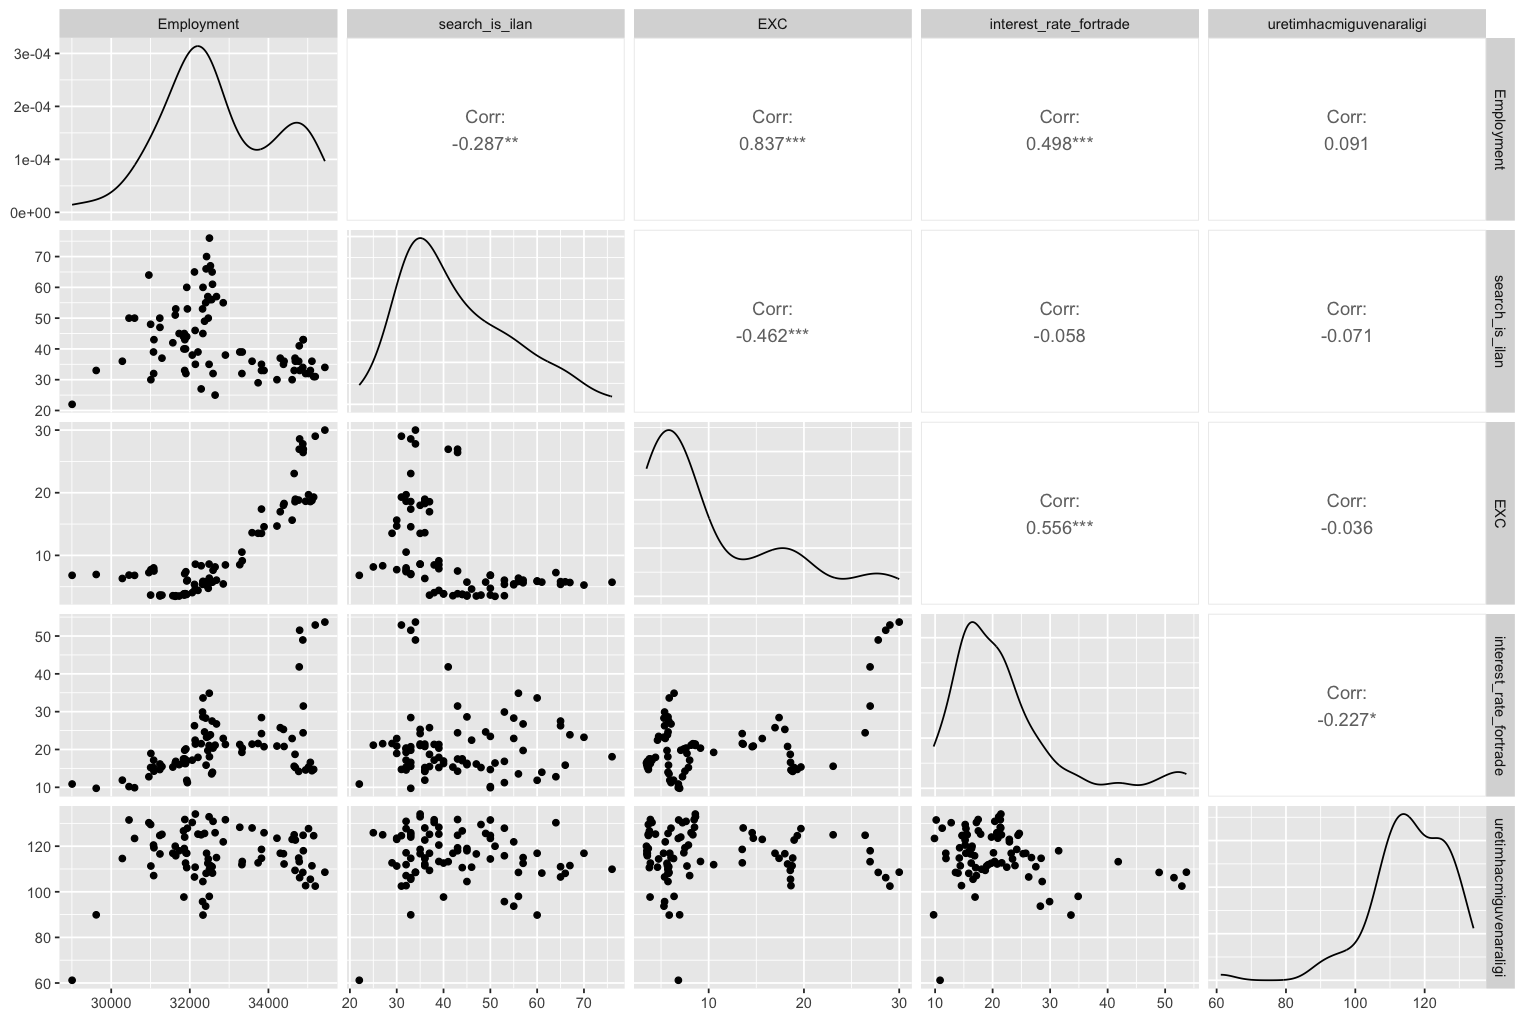

In [686]:
employment=read.xlsx(datapath,sheet='employment')
#monthly_vehicle_production =car_production[,list(total=sum(Production),max_t=max(T_1),weighted_t
#names(car_production)

ggpairs(employment[, c("Employment", "search_is_ilan","EXC","interest_rate_fortrade","uretimhacmiguvenaraligi")])

"search_is_ilan" observed in the ggpairs represents Google Trends data for "is ilani".

In [687]:
employment <- as.data.table(employment)

employment$trend <- 1:nrow(employment)

full_model3 <- lm(formula = Employment ~ trend + interest_rate_fortrade + uretimhacmiguvenaraligi + EXC , data = employment)

summary(full_model3)


Call:
lm(formula = Employment ~ trend + interest_rate_fortrade + uretimhacmiguvenaraligi + 
    EXC, data = employment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2103.8  -483.2   167.7   556.8  1280.3 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             28811.075    961.380  29.968  < 2e-16 ***
trend                       0.940      8.625   0.109    0.913    
interest_rate_fortrade     14.934     12.766   1.170    0.246    
uretimhacmiguvenaraligi    17.279      7.667   2.254    0.027 *  
EXC                       152.711     31.843   4.796  7.5e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 792.2 on 79 degrees of freedom
Multiple R-squared:  0.7197,	Adjusted R-squared:  0.7055 
F-statistic:  50.7 on 4 and 79 DF,  p-value: < 2.2e-16


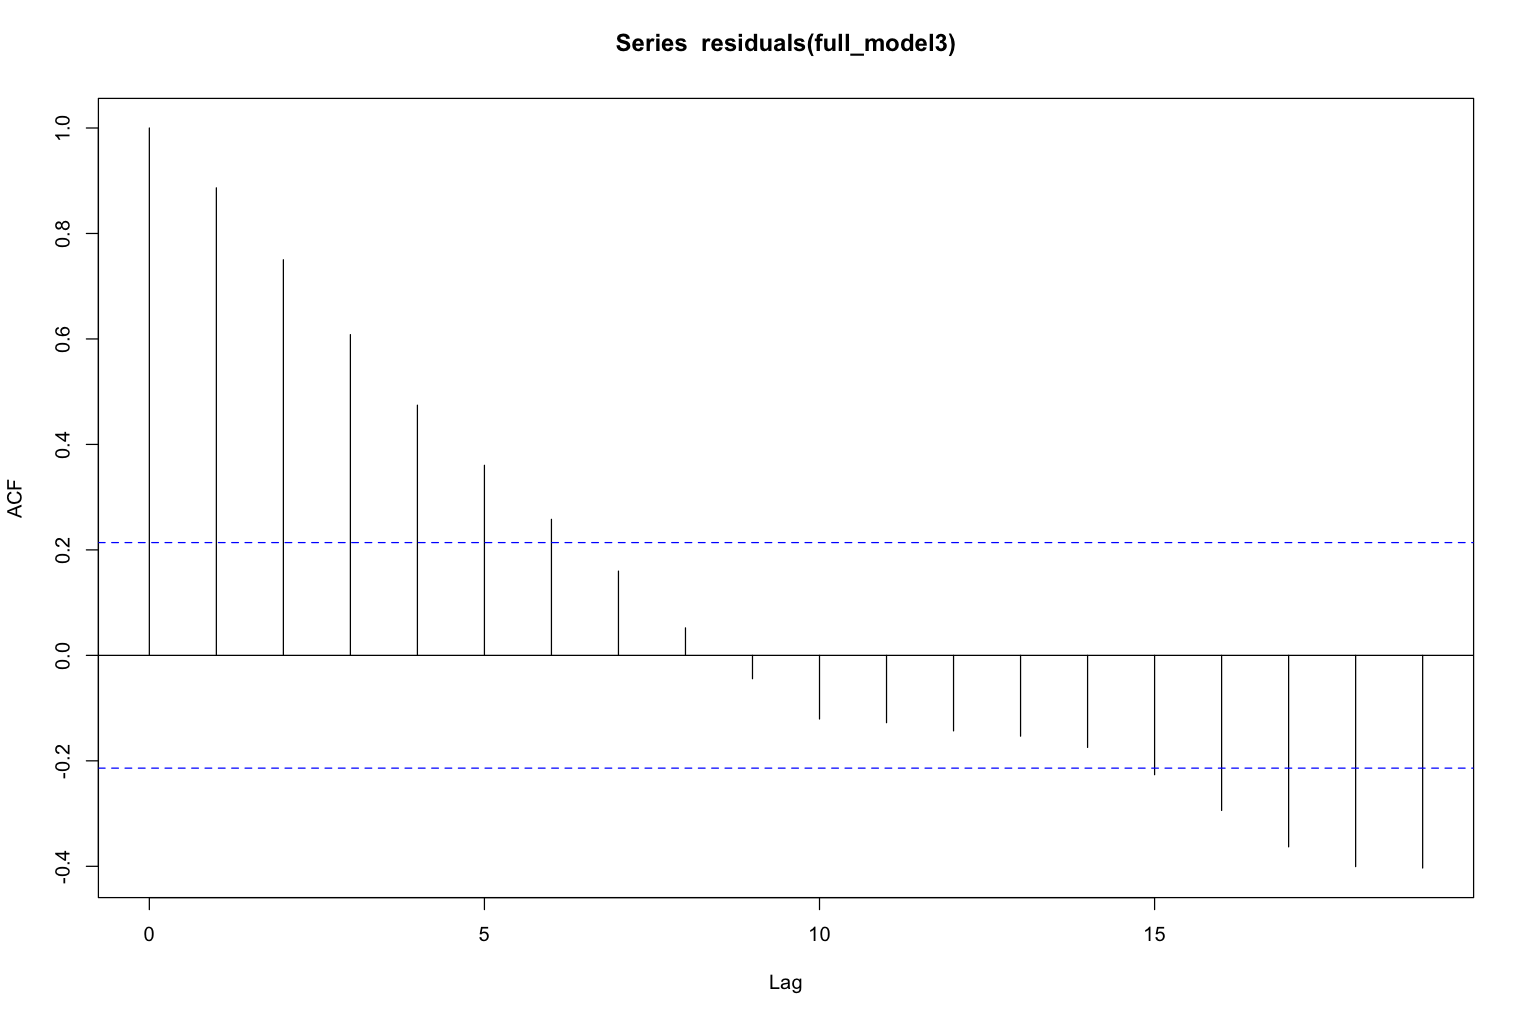

In [688]:
acf(residuals(full_model3))

Although Adjusted R-square value is high and residual standard error is relatively low, according to ACF, the lags in the residuals are significantly correlated. This situation might be an indicator of multicollinearity.

In [689]:
covid_period_start <- "2020-03"
covid_periodfirsteffects <- "2020-05"
employment$is_covid_period <- ifelse(employment$Date >= covid_period_start & employment$Date <= covid_periodfirsteffects, 1, 0)

model_withlags2 <- lm(formula = Employment ~ trend + is_covid_period+ interest_rate_fortrade + uretimhacmiguvenaraligi + EXC , data = employment)

summary(model_withlags2)


Call:
lm(formula = Employment ~ trend + is_covid_period + interest_rate_fortrade + 
    uretimhacmiguvenaraligi + EXC, data = employment)

Residuals:
    Min      1Q  Median      3Q     Max 
-1841.9  -318.4   188.9   397.3   937.1 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             32235.401    945.251  34.102  < 2e-16 ***
trend                       6.400      7.064   0.906    0.368    
is_covid_period         -2978.710    462.355  -6.442 8.87e-09 ***
interest_rate_fortrade     -6.912     10.920  -0.633    0.529    
uretimhacmiguvenaraligi    -8.503      7.408  -1.148    0.255    
EXC                       142.939     25.934   5.512 4.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 644.1 on 78 degrees of freedom
Multiple R-squared:  0.817,	Adjusted R-squared:  0.8053 
F-statistic: 69.66 on 5 and 78 DF,  p-value: < 2.2e-16


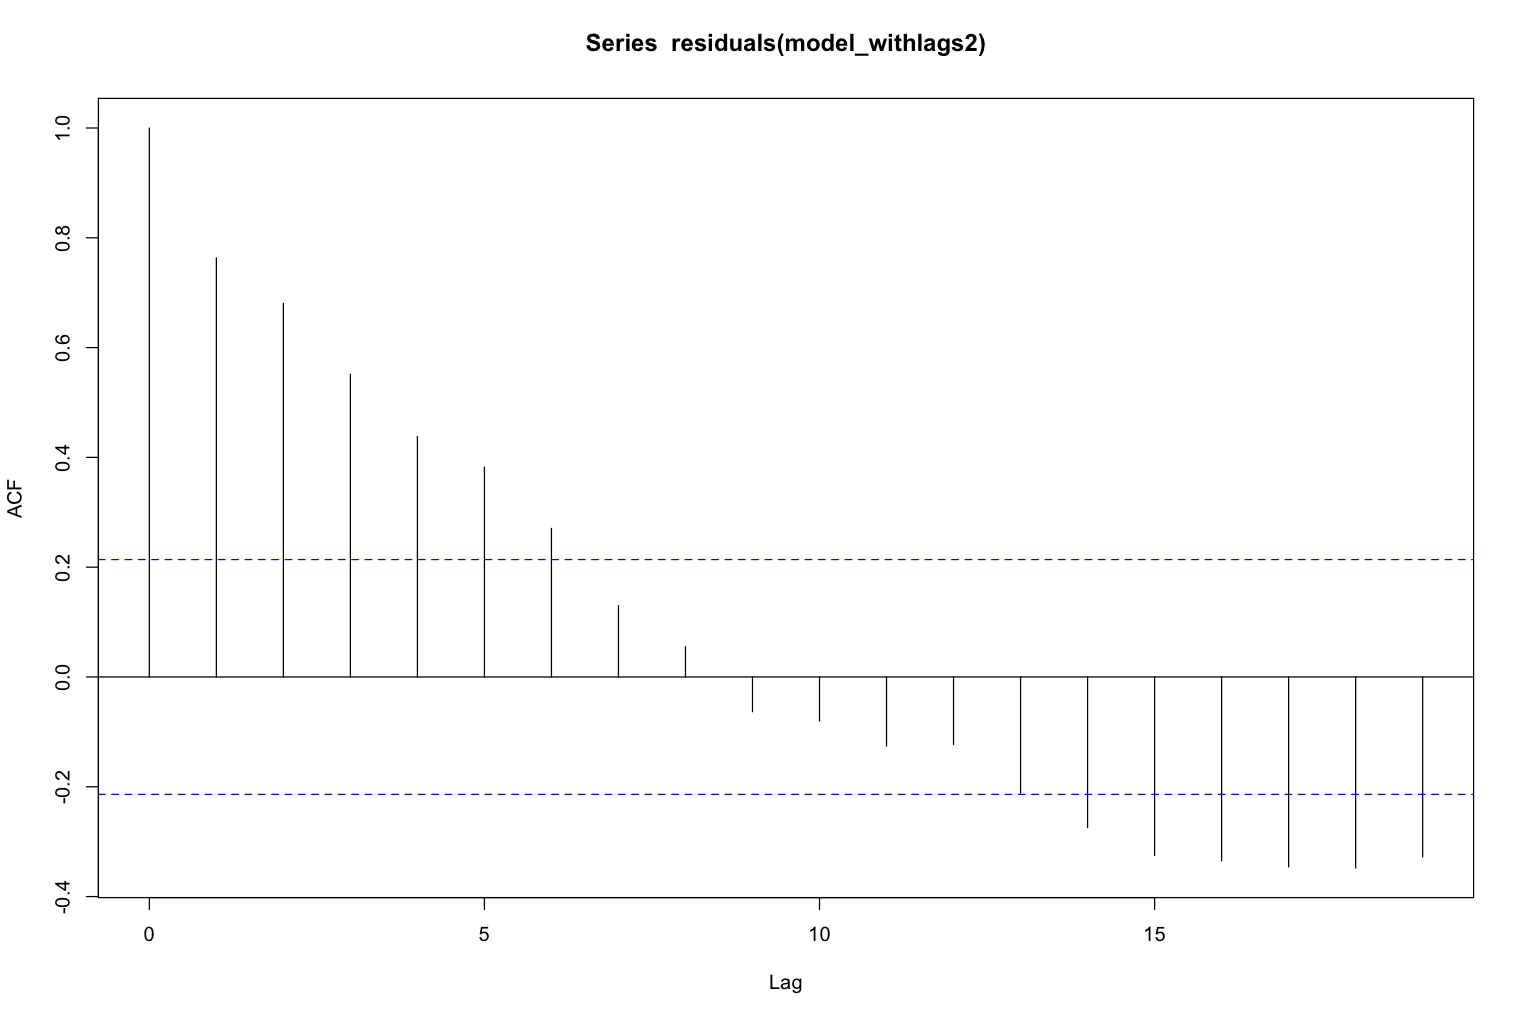

In [690]:
acf(residuals(model_withlags2))

Introducing covid period leads to improvement in adjusted R-square value although it does not break the correlation in the ACF plot.

In [691]:
employment$Date <- as.Date(paste0(employment$Date, "-01"))  # Appending "-01"to form a complete date
employment$month <- format(employment$Date, "%m")

month_dummies1 <- model.matrix(~ month - 1, data = employment)  # '- 1' removes the intercept
employment <- cbind(employment, month_dummies1)

updated_model2 <- update(model_withlags2, . ~ . + month_dummies1)
summary(updated_model2)
# Note: January is omitted to avoid the dummy variable trap (perfect multicollinearity)



Call:
lm(formula = Employment ~ trend + is_covid_period + interest_rate_fortrade + 
    uretimhacmiguvenaraligi + EXC + month_dummies1, data = employment)

Residuals:
    Min      1Q  Median      3Q     Max 
-1505.9  -290.4   171.9   390.3  1184.5 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             33717.052   1175.413  28.685  < 2e-16 ***
trend                       9.980      7.352   1.358   0.1792    
is_covid_period         -3905.525    588.060  -6.641 6.60e-09 ***
interest_rate_fortrade     -8.568     11.157  -0.768   0.4452    
uretimhacmiguvenaraligi   -24.072     10.504  -2.292   0.0251 *  
EXC                       135.491     26.494   5.114 2.84e-06 ***
month_dummies1month01     260.008    359.026   0.724   0.4715    
month_dummies1month02     426.122    398.406   1.070   0.2887    
month_dummies1month03     912.760    444.879   2.052   0.0441 *  
month_dummies1month04     596.248 

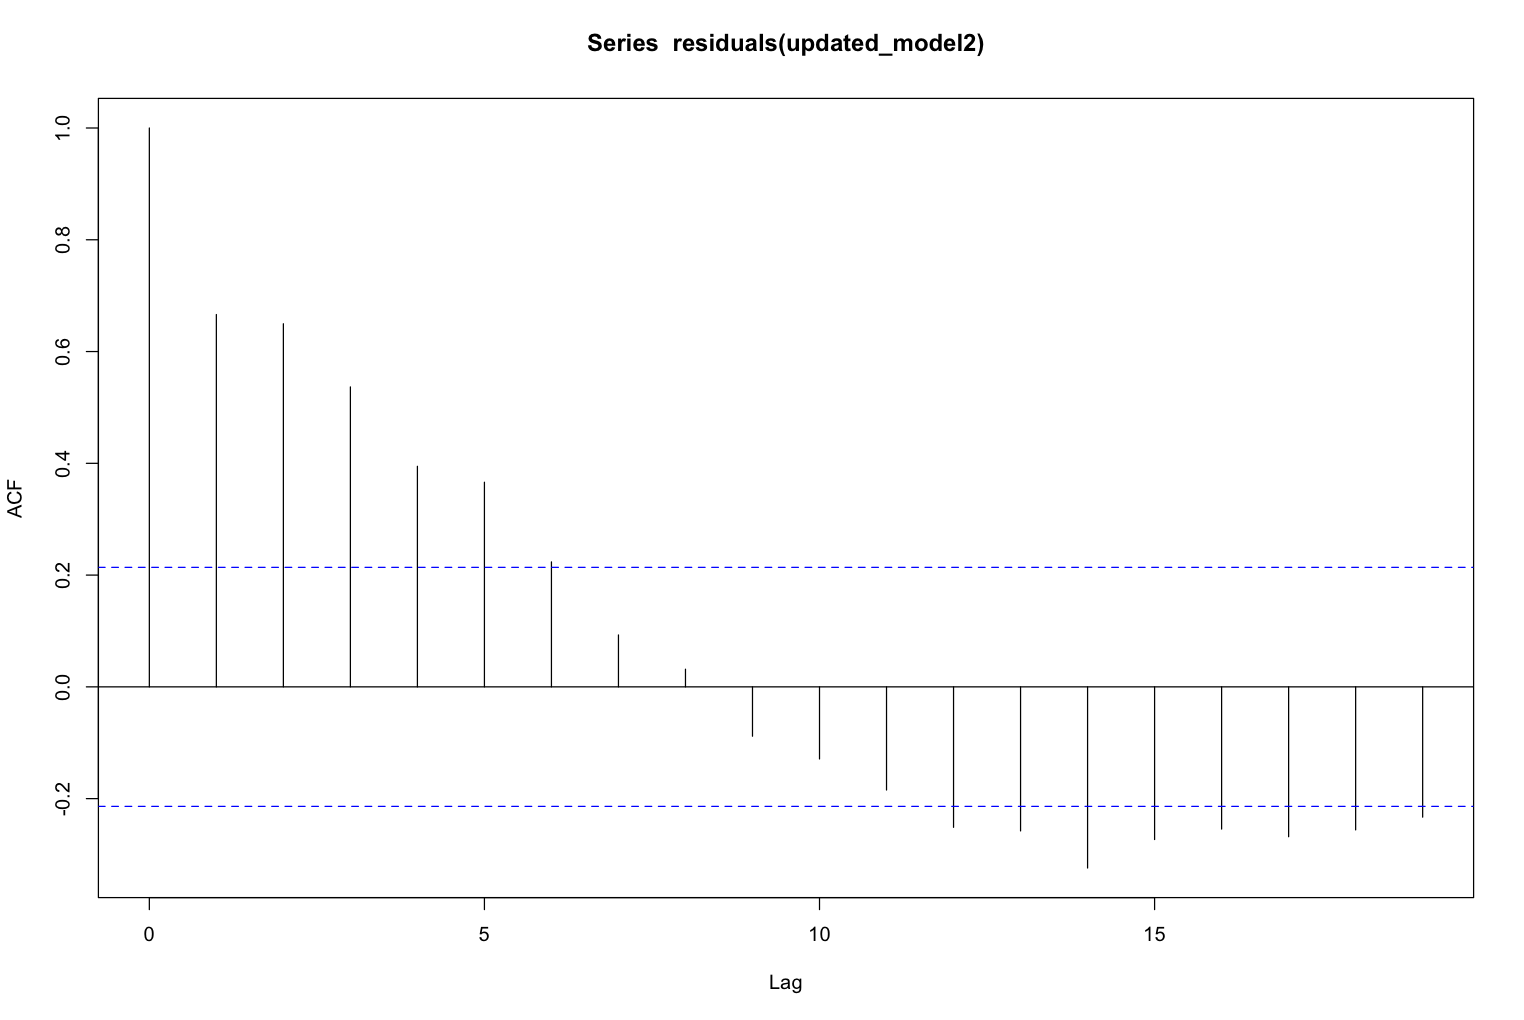

In [692]:
acf(residuals(updated_model2))

The seasonality pattern couldn't be broken by adding monthly dummy variables. Although it cannot be detected from the limited time window, there might be a seasonal pattern within greater data values of employment

Conclusion:
-As we can deduct from the correlation coefficients, Google trends data for relevant searches gives reliable results about the pattern for the related time series.
-The ACF plots of the residuals on top of the adjusted R-square value and low residual standart error/p-values were used as indicators of a good model.
-As stated above, although Adjusted R-square value is high and residual standard error is low in the employment time series analysis, according to ACF, the lags in the residuals are significantly correlated. This situation might be an indicator of multicollinearity between dependent variables selected.
-Although the adjusted R-square values and their residual errors can be improved by introducing more predictors, their ACF plot of residuals are better than the ACF of employment series.